# Movie Recommendation System

## Import libraries

In [2]:
import os
import sys

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Constants

In [5]:
data_Path = '/content/drive/MyDrive/Colab Notebooks/Recommended_Systems_ Movie/ml-100k'

## Reading Data

In [6]:
user_info_path = os.path.join(data_Path, 'u.info')

user_info = pd.read_csv(user_info_path, header=None)
user_info.head()

,0
0,943 users
1,1682 items
2,100000 ratings


### Users Data:

In [7]:
user_data_path = os.path.join(data_Path, 'u.data')

#Reading users file:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
users_df = pd.read_csv(user_data_path, sep='\t', names=column_names)
# Checking shape of users files and head
print(users_df.shape)
users_df.head()

(100000, 4)


,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


### Movies Data:

In [8]:
columns = "item_id | title | release date | video release date | "\
             "IMDb URL | unknown | Action | Adventure | Animation | Children's | "\
              "Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | "\
               "Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western | "

column_names_2 = columns.split(' | ')
movie_data_path = os.path.join(data_Path, 'u.item')

# Reading the movie data
movie_df = pd.read_csv(movie_data_path, sep='|', header=None, names=column_names_2, encoding='latin-1')
movie_df.drop(movie_df.columns[-1], axis=1, inplace=True)
# Checking shape of movie data and look first 5 rows
print(movie_df.shape)
movie_df.head()

(1682, 24)


,item_id,title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
movie_df = movie_df[['item_id', 'title']]
movie_df.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


### Merger Movie and User data

In [10]:
# Combining the data on same column
df= pd.merge(users_df, movie_df, on= 'item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [11]:
refined_df = df.groupby(by=['user_id','title'], as_index=False).agg({"rating":"mean"})

refined_df.head()

,user_id,title,rating
0,1,101 Dalmatians (1996),2.0
1,1,12 Angry Men (1957),5.0
2,1,"20,000 Leagues Under the Sea (1954)",3.0
3,1,2001: A Space Odyssey (1968),4.0
4,1,"Abyss, The (1989)",3.0


## Exploratory data analysis

### The average rating for movies

In [ ]:
NUMBER_MOVIES = 20

Movie_pop = refined_df.groupby('title').agg({'rating':'mean'}).sort_values(by='rating', ascending=False)
fig = px.bar(y=Movie_pop.index[:NUMBER_MOVIES][::-1], x=Movie_pop.rating[:NUMBER_MOVIES][::-1],
             orientation='h', title='Movie Average Rtings',)
fig.update_layout(xaxis_title='Average Ratings', yaxis_title='Movie Title')
fig.show()

### Count of rating for each movies

In [ ]:
NUMBER_MOVIES = 20

movie_rate = refined_df.groupby('title')['rating'].count().sort_values(ascending=False)
fig = px.bar(y=movie_rate.index[:NUMBER_MOVIES][::-1], x=movie_rate[:NUMBER_MOVIES][::-1],
             orientation='h', title='Movie with most # of rtings',)
fig.update_layout(xaxis_title='# Ratings', yaxis_title='Movie Title')
fig.show()

## The average rating for users

In [ ]:
NUMBER_USERS = 20

user_pop = refined_df.groupby('user_id').agg({'rating':'mean'}).sort_values(by='rating', ascending=False)
user_pop.index = user_pop.index.map(str)
fig = px.bar(y=user_pop.index[:NUMBER_USERS][::-1], x=user_pop.rating[:NUMBER_USERS][::-1],
             orientation='h', title='User Average Rtings',)
fig.update_layout(xaxis_title='Average Ratings', yaxis_title='User ID')
fig.show()

## Count of rating for each users

In [ ]:
NUMBER_USERS = 20

user_rate = refined_df.groupby('user_id')['rating'].count().sort_values(ascending=False)
user_rate.index = user_rate.index.map(str)
fig = px.bar(y=user_rate.index[:NUMBER_USERS][::-1], x=user_rate[:NUMBER_USERS][::-1],
             orientation='h', title='Users with most # of rtings',)
fig.update_layout(xaxis_title='# Ratings', yaxis_title='User ID')
fig.show()

## Rating data frame with average rating and number of ratings

In [ ]:
# Averge rating
ratings= pd.DataFrame(df.groupby('title')['rating'].mean())

# Rating counts
ratings['rating_counts']= pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,rating_counts
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


## Rating Histogram

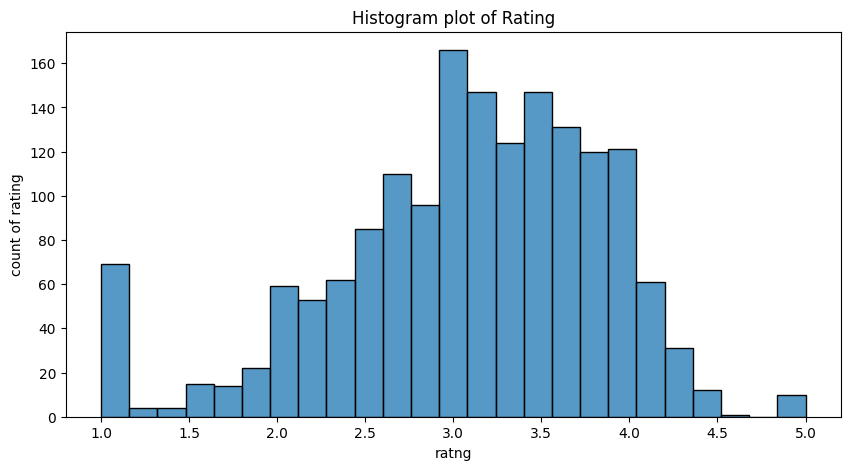

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(ratings['rating'])
plt.title("Histogram plot of Rating")
plt.xlabel('ratng')
plt.ylabel('count of rating')
plt.show()

## Rating vs # of ratings

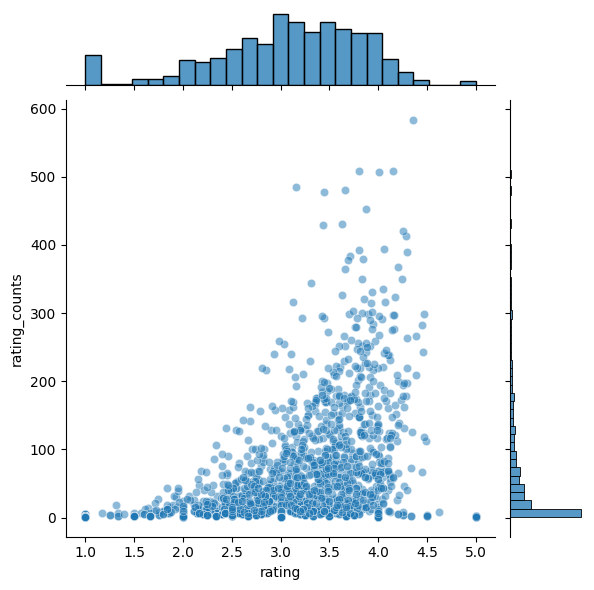

In [ ]:
sns.jointplot(x='rating',y='rating_counts',data=ratings,alpha=0.5)

## Method 1: Recommending Similar Movies - correlation

In [ ]:
movies_reco= refined_df.pivot_table(index='user_id', columns='title',values='rating')
movies_reco.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [ ]:
# Finding the similar movies from pivot_table
def get_similar_movies_1(movie_name, num_movies=5):
  similar_movie= movies_reco.corrwith(movies_reco[movie_name])
  # Making data frame with columns correlation
  corr_movie = pd.DataFrame(similar_movie, columns=['Correlation'])
  # Droping the nan values
  corr_movie.dropna(inplace=True)
  #combining the no of users watched that movies
  corr_movie = corr_movie.join(ratings['rating_counts'])
  # Cosidering more than 100 users watched that movies
  return corr_movie[corr_movie['rating_counts']>100].sort_values(by='Correlation',ascending=False)[1:num_movies + 1]

In [ ]:
get_similar_movies_1('Return of the Jedi (1983)', num_movies=10)

,Correlation,rating_counts
title,,
"Empire Strikes Back, The (1980)",0.721229,367
Star Wars (1977),0.672556,583
Raiders of the Lost Ark (1981),0.467391,420
Indiana Jones and the Last Crusade (1989),0.422294,331
Sneakers (1992),0.412559,150
Back to the Future (1985),0.411901,350
"Frighteners, The (1996)",0.391322,115
True Lies (1994),0.364536,208
Die Hard: With a Vengeance (1995),0.363133,151


## Method 2: Recommending Similar Movies - Cosine similarity - KNN

In [ ]:
# Lets create a pivot table
movies_df= refined_df.pivot_table(index="title",columns='user_id',values='rating').fillna(0)
movies_df.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-900 (1994),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians (1996),2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),5.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
187 (1997),0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
movies_df_metrix= csr_matrix(movies_df.values)

# Building the model
model_knn= NearestNeighbors(metric= 'cosine', algorithm='brute')

# Fitting the model
model_knn.fit(movies_df_metrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
def get_similar_movies_2(movie_name, num_movies=10):
  select_movies = movies_df.index.get_loc(movie_name)
  distances, indices = model_knn.kneighbors(movies_df.iloc[select_random_movies,:].values.reshape(1,-1), n_neighbors= num_movies+1)
  for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(movies_df.index[select_movies]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, movies_df.index[indices.flatten()[i]], distances.flatten()[i]))

In [ ]:
get_similar_movies_2('12 Angry Men (1957)', num_movies=10)

Recommendations for 12 Angry Men (1957):

1: Ransom (1996), with distance of 0.48533492268013545:
2: Broken Arrow (1996), with distance of 0.49638752762930716:
3: Independence Day (ID4) (1996), with distance of 0.5079910425970572:
4: Executive Decision (1996), with distance of 0.5212237966304303:
5: Rock, The (1996), with distance of 0.5263104305879673:
6: Mission: Impossible (1996), with distance of 0.5362123932646354:
7: Time to Kill, A (1996), with distance of 0.5482883734494423:
8: Phenomenon (1996), with distance of 0.548315379420542:
9: Eraser (1996), with distance of 0.5517712251584381:
10: Twister (1996), with distance of 0.5521373541674893:


## Method 3: Recommending Similar users - Cosine similarity - KNN

In [ ]:
movies_reco_2= refined_df.pivot_table(index='user_id', columns='title',values='rating').fillna(0)
movies_reco_2.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0


In [ ]:
movies_reco_2_metrix= csr_matrix(movies_reco_2.values)

# Building the model
model_knn_2= NearestNeighbors(metric= 'cosine', algorithm='brute')

# Fitting the model
model_knn_2.fit(movies_reco_2_metrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
def get_similar_user(user_id, num_users=10):
  select_users = movies_reco_2.index.get_loc(user_id)
  distances, indices = model_knn_2.kneighbors(movies_reco_2.iloc[select_users,:].values.reshape(1,-1), n_neighbors= num_users+1)

  print(f"Top {num_users}, users who are very much similar to the User {user_id} are: ")
  print(" ")
  for i in range(1,len(distances[0])):
    print(f"{i} . User: {indices[0][i]+1} separated by distance of {distances[0][i]:0.3f}")


In [ ]:
get_similar_user(52, num_users=9)

Top 9, users who are very much similar to the User 52 are: 
 
1 . User: 569 separated by distance of 0.595
2 . User: 634 separated by distance of 0.607
3 . User: 463 separated by distance of 0.617
4 . User: 919 separated by distance of 0.621
5 . User: 770 separated by distance of 0.629
6 . User: 277 separated by distance of 0.632
7 . User: 63 separated by distance of 0.637
8 . User: 26 separated by distance of 0.642
9 . User: 624 separated by distance of 0.642
